# Assignment: Evaluating Data from a Form

A client has been testing a [small form](index.html) to gather some basic data about their client-base. They have brought their findings to you to validate the data they have gathered. You can open the `index.html` page in a browser to take a look at the form.

You have been provided a [dataset of csv records](../../data/form.csv) that contain entries from the form as well as some basic visualizations.The client pointed out that some of the visualizations look incorrect but they're unsure about how to resolve them. You can explore it in the [assignment notebook](assignment.ipynb).

## Instructions

Use the techniques in this lesson to make recommendations about the form so it captures accurate and consistent information. 

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

form_df = pd.read_csv('form.csv')
print(form_df)

  birth_month       state   pet
0     January         NaN  Cats
1         JAN          CA  Cats
2        Sept      Hawaii   Dog
3     january          AK   Dog
4        July          RI  Cats
5   September  California  Cats
6       April          CA   Dog
7     January  California  Cats
8    November          FL   Dog
9    December     Florida  Cats


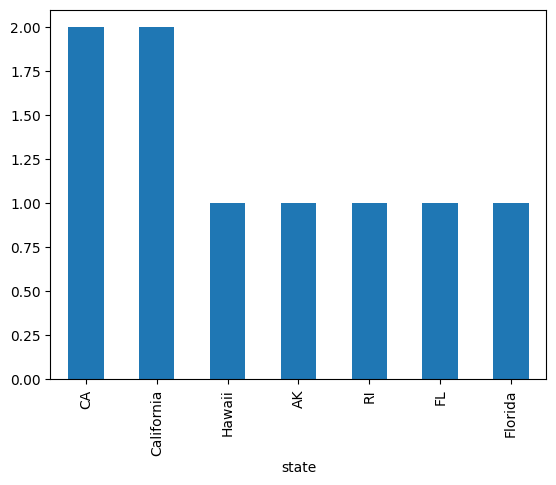

In [22]:
form_df['state'].value_counts().plot(kind='bar');
plt.show()

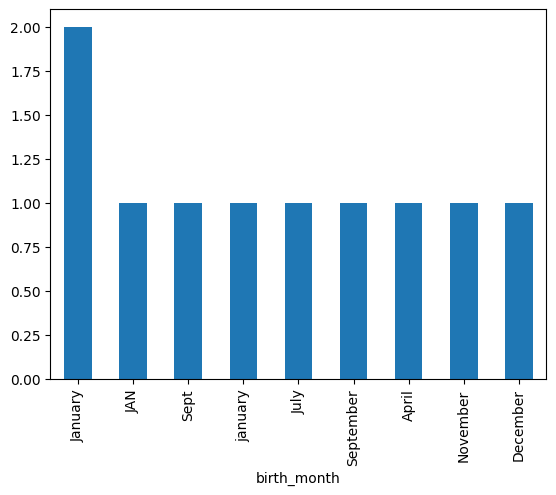

In [23]:
form_df['birth_month'].value_counts().plot(kind='bar');
plt.show()

# SOLUTION : Recommendations

## Step 1. Standardize State Names:

#### Convert all state abbreviations to full names and to uppercase or lowercase for uniformity

In [34]:
# Converting all entries to upper case
form_df['state'] = form_df['state'].str.upper()

# Converting all abbreviations to full names
state_full = {'CA': 'California', 'AK': 'Alaska', 'RI': 'Rhode Island', 'FL': 'Florida'}
form_df['state'] = form_df['state'].map(state_full).fillna(form_df['state'])


print(form_df)

  birth_month         state   pet
0     January       UNKNOWN  Cats
1     January    CALIFORNIA  Cats
2        Sept        HAWAII   Dog
3     January        ALASKA   Dog
4        July  RHODE ISLAND  Cats
5   September    CALIFORNIA  Cats
6       April    CALIFORNIA   Dog
7     January    CALIFORNIA  Cats
8    November       FLORIDA   Dog
9    December       FLORIDA  Cats


## Step 2. Standardize Birth Month Names:

#### Standardize the month names by Converting month name abbreviations to full names and changing the case to uniform case

In [35]:
#Converting to title Case
form_df['birth_month'] = form_df['birth_month'].str.title() 

# Month mapping
month = {'Jan': 'January', 'Feb': 'February', 'Mar': 'March', 'Apr': 'April', 'May': 'May', 'Jun': 'June', 'Jul': 'July', 'Aug': 'August', 'Sep': 'September', 'Oct': 'October', 'Nov': 'November', 'Dec': 'December'}
form_df['birth_month'] = form_df['birth_month'].map(month).fillna(form_df['birth_month'])


print(form_df)

  birth_month         state   pet
0     January       UNKNOWN  Cats
1     January    CALIFORNIA  Cats
2        Sept        HAWAII   Dog
3     January        ALASKA   Dog
4        July  RHODE ISLAND  Cats
5   September    CALIFORNIA  Cats
6       April    CALIFORNIA   Dog
7     January    CALIFORNIA  Cats
8    November       FLORIDA   Dog
9    December       FLORIDA  Cats


## Step 3. Handle Missing Values:

Replacing 'NaN' in the 'state' column with 'Unknown'

In [36]:
form_df['state'].fillna('Unknown', inplace=True) 

print(form_df)

  birth_month         state   pet
0     January       UNKNOWN  Cats
1     January    CALIFORNIA  Cats
2        Sept        HAWAII   Dog
3     January        ALASKA   Dog
4        July  RHODE ISLAND  Cats
5   September    CALIFORNIA  Cats
6       April    CALIFORNIA   Dog
7     January    CALIFORNIA  Cats
8    November       FLORIDA   Dog
9    December       FLORIDA  Cats


## Step 4. Replot Visualizations:

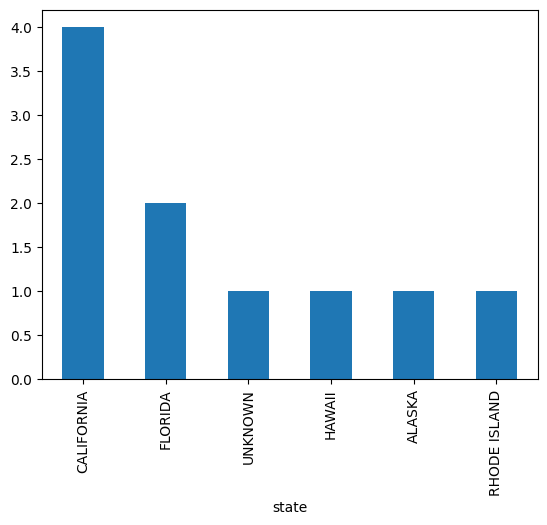

In [38]:
form_df['state'].value_counts().plot(kind='bar')
plt.show()


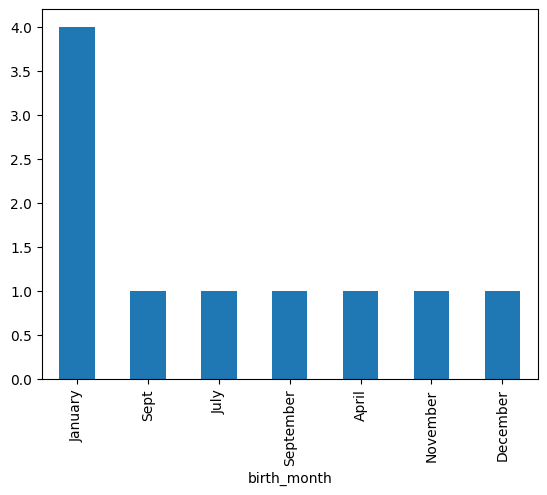

In [39]:
form_df['birth_month'].value_counts().plot(kind='bar')
plt.show()